# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (22)

**19/02/2024**

# `ALEJANDRO SÁNCHEZ MONZÓN`

In [1]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 18, 8 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

In [3]:
import math
def bic_score(X, labels):
  """
  BIC score for the goodness of fit of clusters.
  """

  n_points = len(labels)
  n_clusters = len(set(labels))
  n_dimensions = X.shape[1]

  n_parameters = (n_clusters - 1) + (n_dimensions * n_clusters) + 1

  loglikelihood = 0
  for label_name in set(labels):
    X_cluster = X[labels == label_name]
    n_points_cluster = len(X_cluster)
    centroid = np.mean(X_cluster, axis=0)
    variance = np.sum((X_cluster - centroid) ** 2) / (len(X_cluster) - 1)
    loglikelihood += \
      n_points_cluster * np.log(n_points_cluster) \
      - n_points_cluster * np.log(n_points) \
      - n_points_cluster * n_dimensions / 2 * np.log(2 * math.pi * variance) \
      - (n_points_cluster - 1) / 2

  bic = loglikelihood - (n_parameters / 2) * np.log(n_points)

  return -bic

---

### Datasets con patrones no lineales

Vamos a realizar un ejercicio de cluestring con datos irregulares que presentan una no linealidad alta.

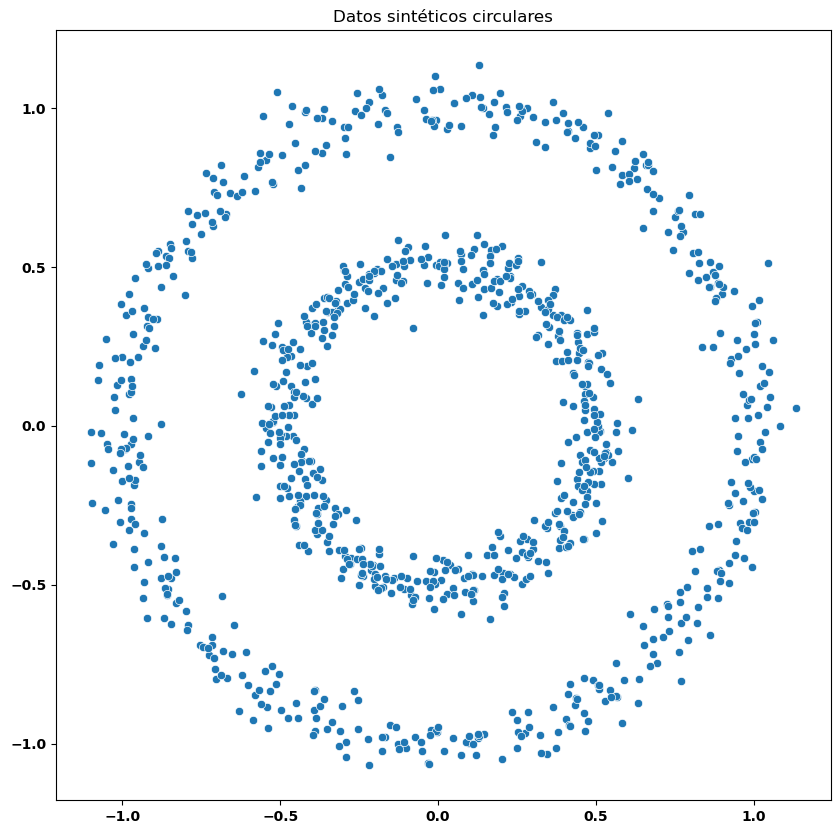

In [4]:
from sklearn.datasets import make_circles

datos_cir, etiquetas_cir = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=99)

plt.figure(figsize=(10,10))
sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1])
plt.title("Datos sintéticos circulares")
plt.show()


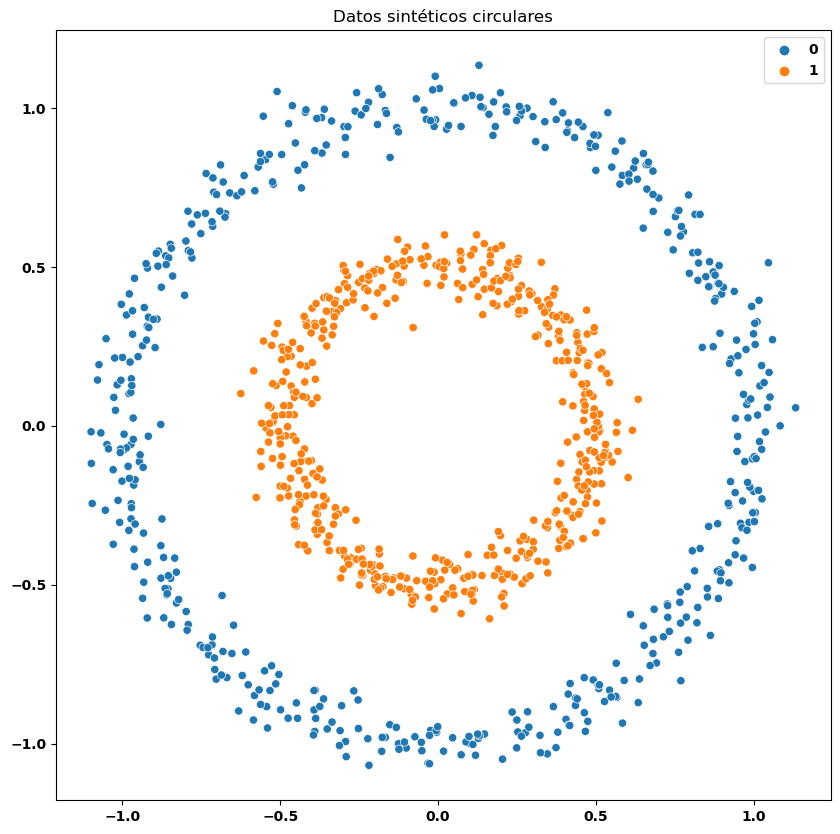

In [5]:
from sklearn.datasets import make_circles

datos_cir, etiquetas_cir = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=99)

plt.figure(figsize=(10,10))
sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=etiquetas_cir)
plt.title("Datos sintéticos circulares")
plt.show()


### **`Ejercicio 22.1`**

**`22.1.1`** Utiliza las distintas técnicas de análisis de calidad de clustering para ver si se puede estimar a periori el número de los grupos de datos presentes en este data set:

 - WSS (Elbow method)
 - Silhouette score
 - Davies-Bouldin index
 - Calinski and Harabasz score
 - BIC score
 - BIC score of GMM
 - `random_state=100`

**`22.1.2`** Considerando que el número óptimo de clusters para estos datos sería dos (_k=2_), crea diferentes modelos de clustering, genera las gráficas de cada modelo, dibuja la comparación con el dataset original y calcula sus **porcentages de aciertos** para analizar y **comparar los resultados** obtenidos:  

 - Mean Shift
 - K-means
 - GMM
 - Agglomerative (`linkage='ward', metric='euclidean'`)
 - Agglomerative (`linkage='single', metric='euclidean'`)
 - DBSCAN (`eps=0.25`)
 - OPTICS (`min_samples=7, xi=0.1, min_cluster_size=0.2`)

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

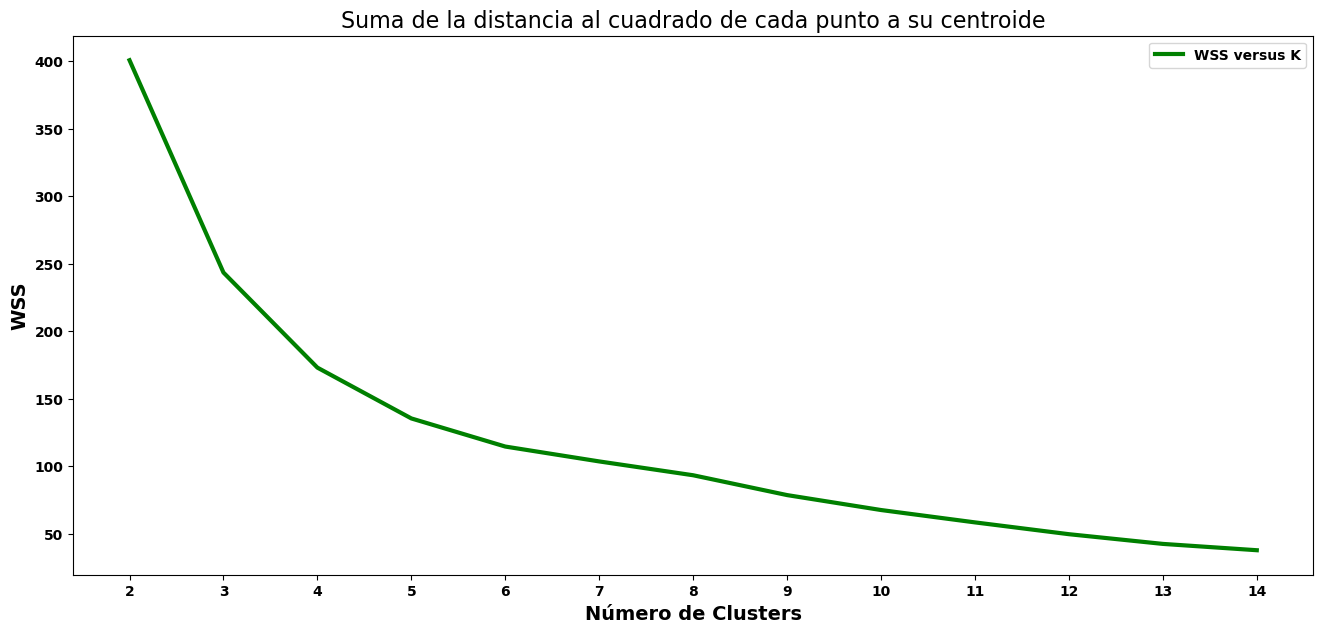

In [6]:
## Solución Ejercicio 22.1.1
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
distor_clust_22_1_1 = []
for k in range(2, 15):
    modelo_km_22_1_1 = KMeans(n_clusters=k, random_state=100)
    modelo_km_22_1_1.fit(datos_cir)
    distor_clust_22_1_1.append(modelo_km_22_1_1.inertia_)

plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=distor_clust_22_1_1, color='green', label='WSS versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Suma de la distancia al cuadrado de cada punto a su centroide", fontsize=16)
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("WSS", fontsize=14)
plt.show()

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

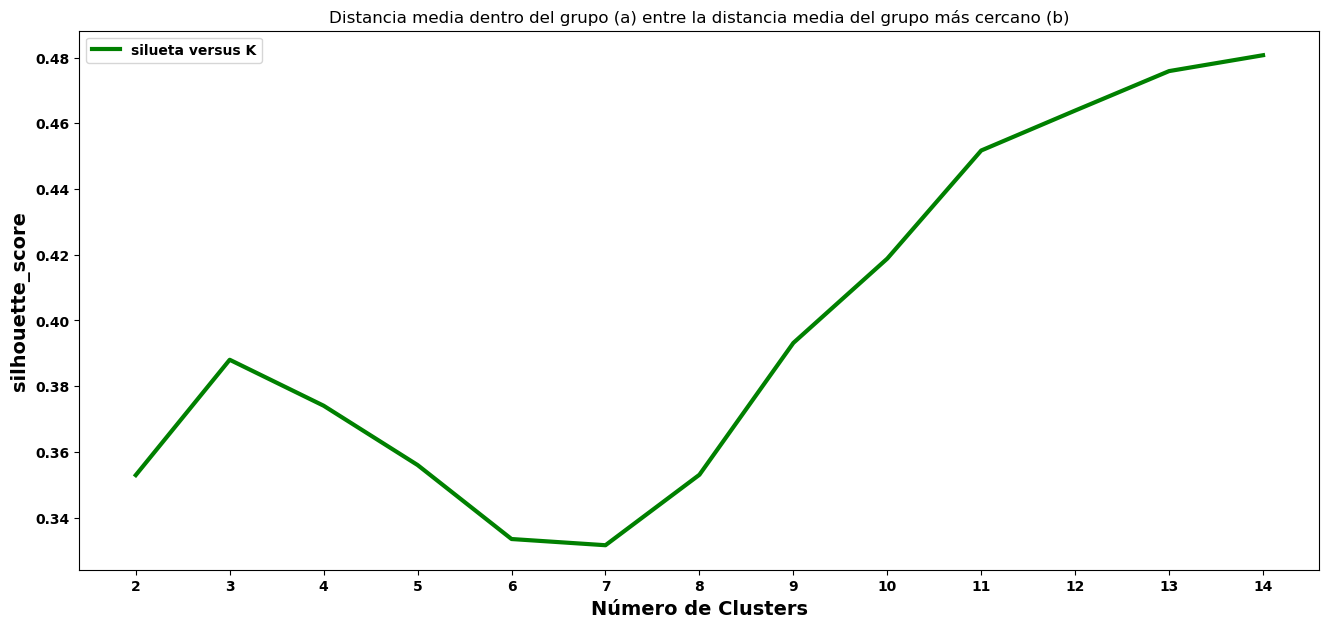

In [7]:
sil_clust_22_1_1 = []
for k in range(2, 15):
    modelo_km_22_1_1 = KMeans(n_clusters=k, random_state=100)
    modelo_km_22_1_1.fit(datos_cir)
    y_modelo_km_22_1_1 = modelo_km_22_1_1.predict(datos_cir)
    sil_clust_22_1_1.append(silhouette_score(datos_cir, y_modelo_km_22_1_1))

plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=sil_clust_22_1_1, color='green', label='silueta versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Distancia media dentro del grupo (a) entre la distancia media del grupo más cercano (b)")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("silhouette_score", fontsize=14)
plt.show()

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

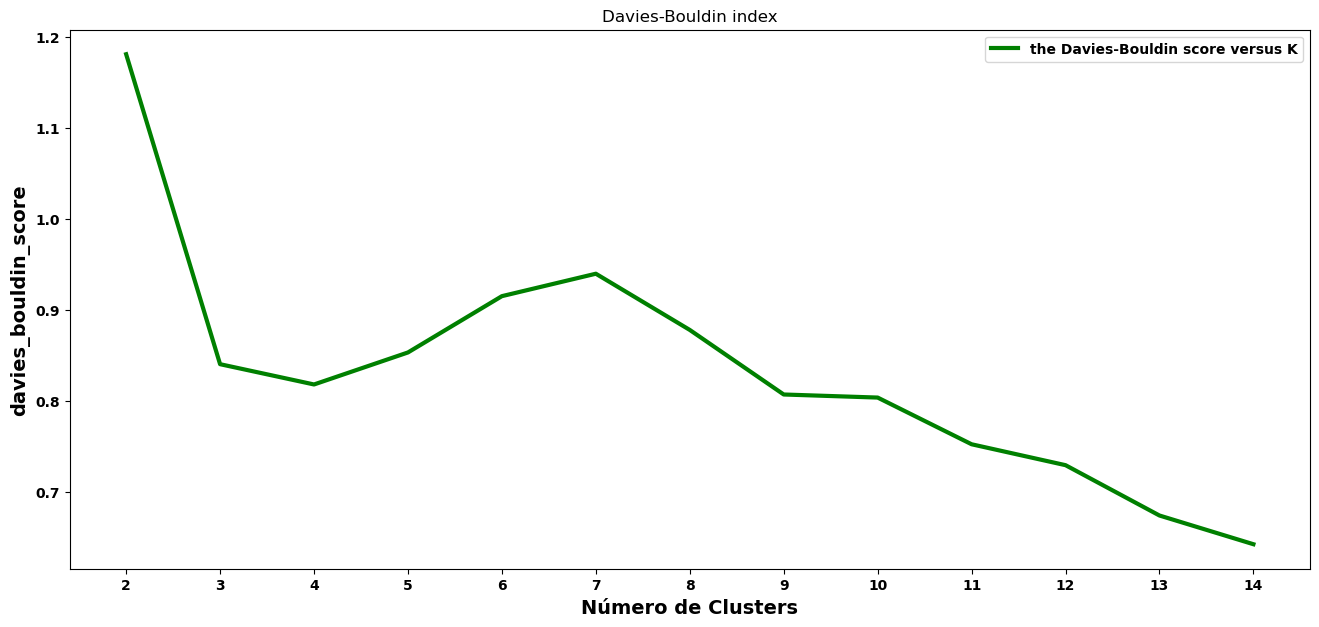

In [8]:
from sklearn.metrics import davies_bouldin_score
dav_clust_22_1_1 = []
for k in range(2, 15):
    modelo_km_22_1_1 = KMeans(n_clusters=k, random_state=100)
    modelo_km_22_1_1.fit(datos_cir)
    y_modelo_km_22_1_1 = modelo_km_22_1_1.predict(datos_cir)
    dav_clust_22_1_1.append(davies_bouldin_score(datos_cir, y_modelo_km_22_1_1))

plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=dav_clust_22_1_1, color='green', label='the Davies-Bouldin score versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Davies-Bouldin index")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("davies_bouldin_score", fontsize=14)
plt.show()

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

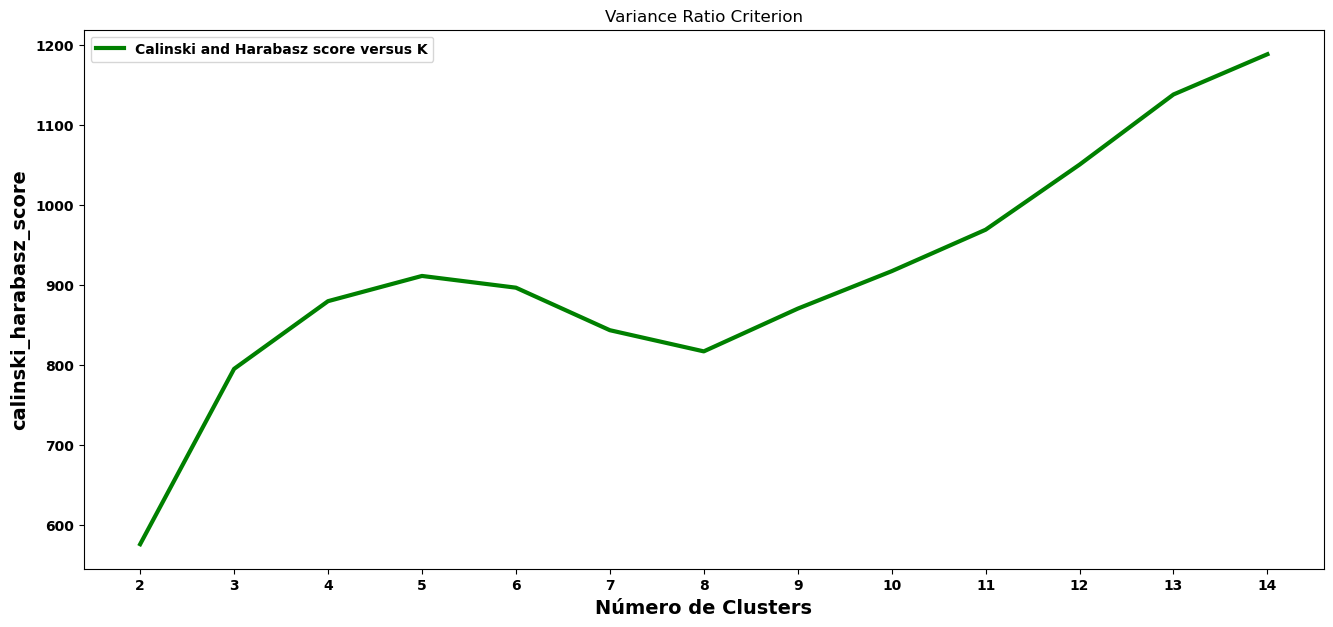

In [9]:
from sklearn.metrics import calinski_harabasz_score
calinsk_clust_22_1_1 = []
for k in range(2, 15):
    modelo_km_22_1_1 = KMeans(n_clusters=k, random_state=100)
    modelo_km_22_1_1.fit(datos_cir)
    y_modelo_km_22_1_1 = modelo_km_22_1_1.predict(datos_cir)
    calinsk_clust_22_1_1.append(calinski_harabasz_score(datos_cir, y_modelo_km_22_1_1))

plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=calinsk_clust_22_1_1, color='green', label='Calinski and Harabasz score versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Variance Ratio Criterion")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("calinski_harabasz_score", fontsize=14)
plt.show()

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

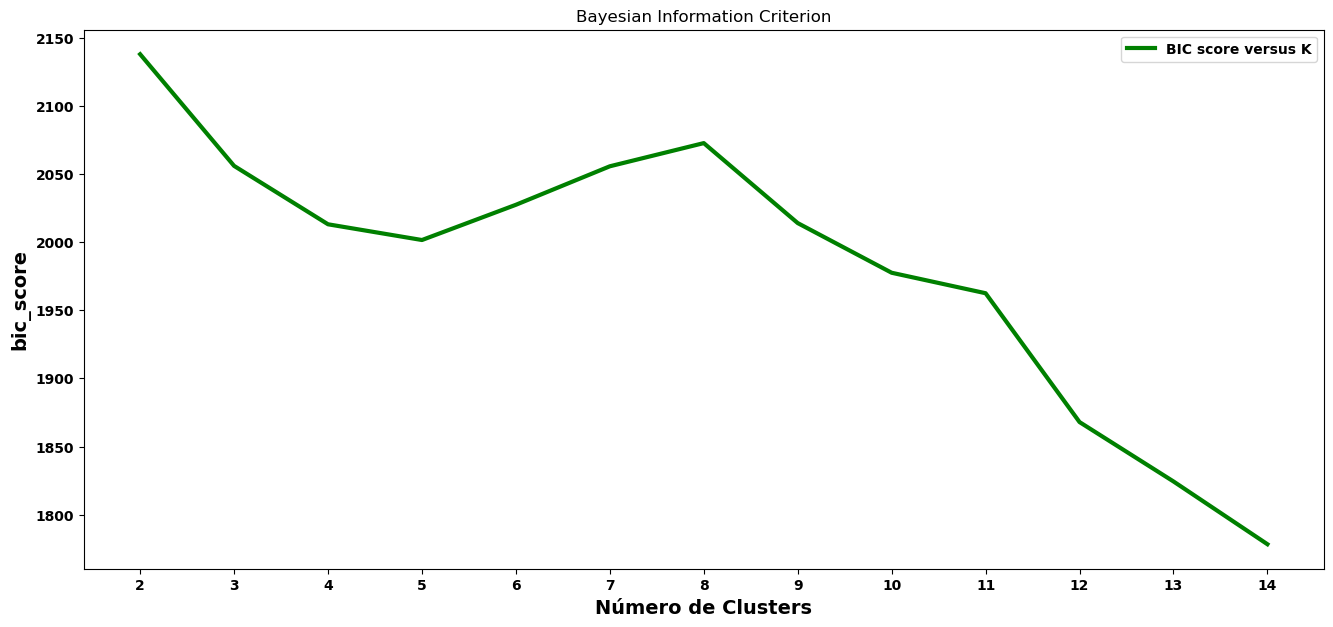

In [10]:
bic_clust_22_1_1 = []
for k in range(2, 15):
    modelo_km_22_1_1 = KMeans(n_clusters=k, random_state=100)
    modelo_km_22_1_1.fit(datos_cir)
    y_modelo_km_22_1_1 = modelo_km_22_1_1.predict(datos_cir)
    bic_clust_22_1_1.append(bic_score(datos_cir, y_modelo_km_22_1_1))

plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=bic_clust_22_1_1, color='green', label='BIC score versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Bayesian Information Criterion")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("bic_score", fontsize=14)
plt.show()

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

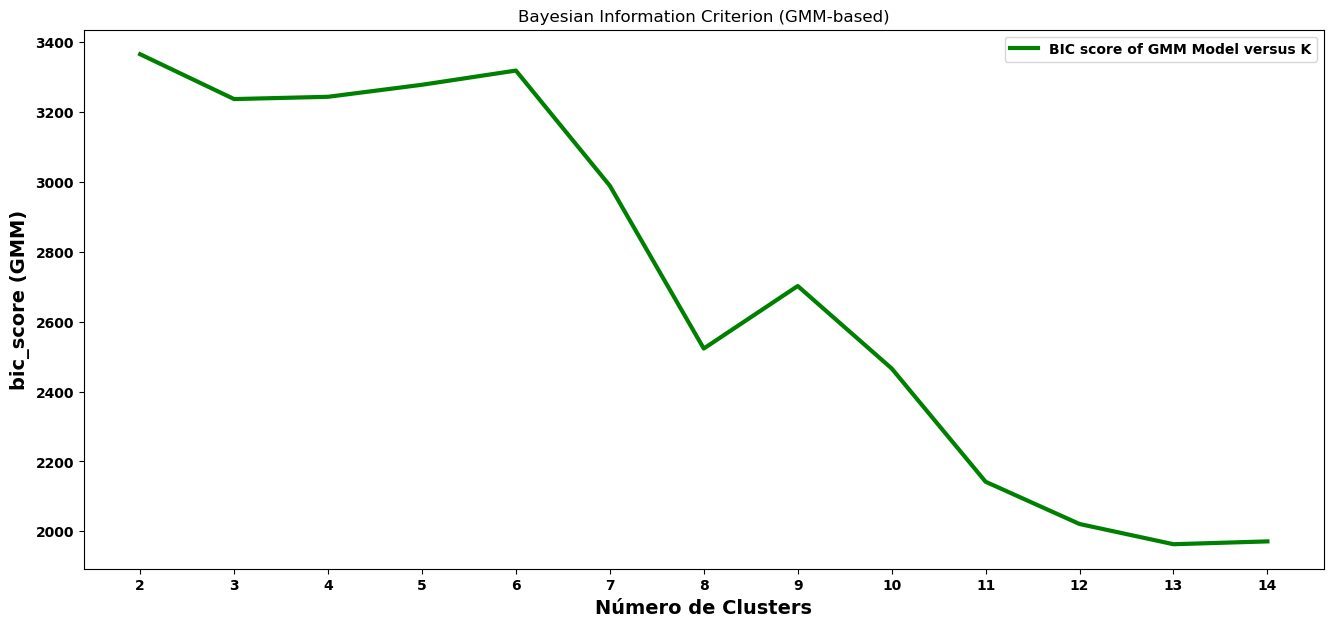

In [11]:
from sklearn.mixture import GaussianMixture

bic_gmm_22_1_1 = []
for k in range(2, 15):
    modelo_gmm_22_1_1 = GaussianMixture(n_components=k, random_state=100)
    modelo_gmm_22_1_1.fit(datos_cir)
    bic_gmm_22_1_1.append(modelo_gmm_22_1_1.bic(datos_cir))

plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=bic_gmm_22_1_1, color='green', label='BIC score of GMM Model versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Bayesian Information Criterion (GMM-based)")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("bic_score (GMM)", fontsize=14)
plt.show()

> #### Explicación 22.1.1
> En base a las diferentes gráficas, podemos estimar que el valor para el número de clusters ronda entre **7 y 8**. 
>
>Para el **Elbow Method**, el rango de valores que más pueden llamarnos la atención son 7-8. Para **Silhouette**, ronda en torno al 6-7. Para **Davies Bouldin** también se ubica entre 6-7. Para **Calinski**, el valor que más nos llama la atención es 8. Para **BIC**, de igual forma que el anterior, también nos llama la atención el valor 8. Por último, para **GMM**, el valor 8 también es el que más resalta.
>
> Ninguno de ellos se acerca al valor **2**, que debería ser el acertado.

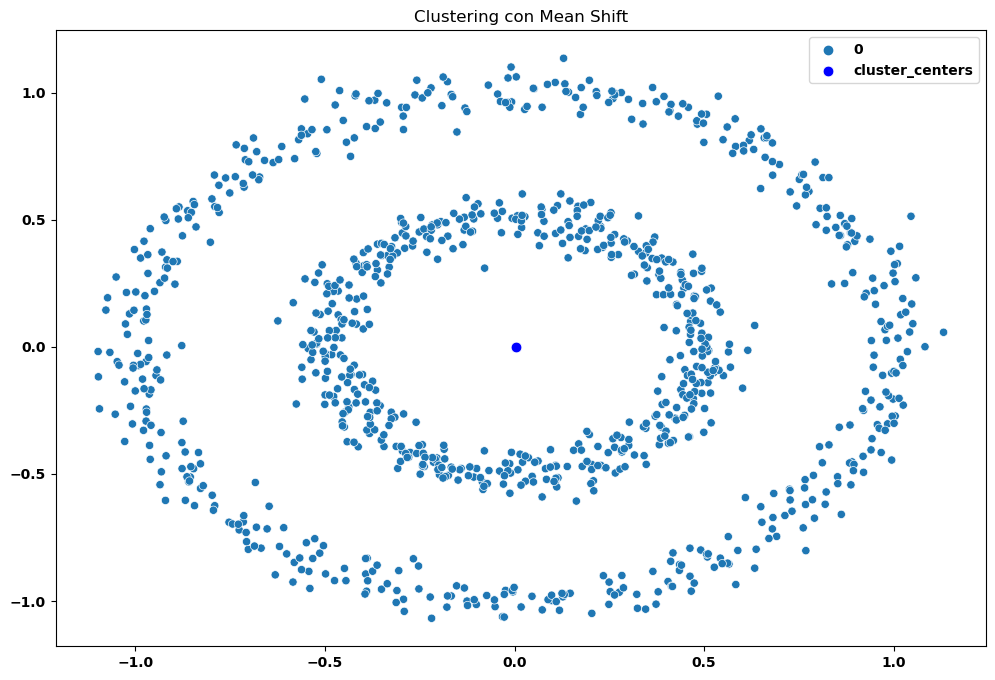

In [12]:
## Solución Ejercicio 22.1.2
from sklearn.cluster import MeanShift

modelo_ms_22_1_2 = MeanShift(bin_seeding=True, n_jobs=-1)

modelo_ms_22_1_2.fit(datos_cir)

y_etiquetas_ms_22_1_2 = modelo_ms_22_1_2.labels_

centros_ms_22_1_2 = modelo_ms_22_1_2.cluster_centers_

# print("Silhouette score = ", silhouette_score(datos_cir, y_etiquetas_ms_22_1_2))

fig, axes = plt.subplots(1, figsize=(12,8))
sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=y_etiquetas_ms_22_1_2)
sns.scatterplot(x=centros_ms_22_1_2[:,0], y=centros_ms_22_1_2[:,1], color='blue', s=60, label='cluster_centers')
plt.title("Clustering con Mean Shift")
plt.show()

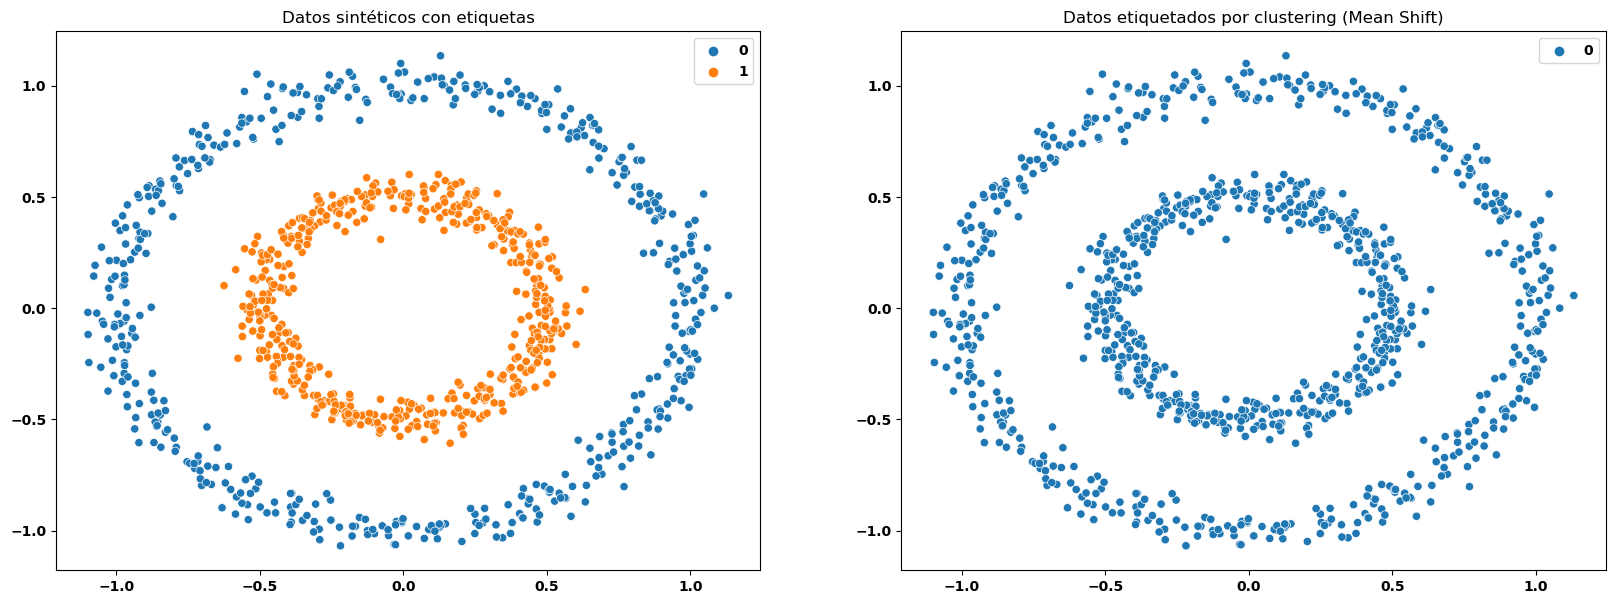

In [13]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=etiquetas_cir, ax=axes[0])
axes[0].set_title("Datos sintéticos con etiquetas")

sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=y_etiquetas_ms_22_1_2, ax=axes[1])
axes[1].set_title("Datos etiquetados por clustering (Mean Shift)")

plt.show()

In [14]:
diff_pos_ms_22_1_2 = [i for i in range(len(y_etiquetas_ms_22_1_2)) if y_etiquetas_ms_22_1_2[i]!=etiquetas_cir[i]]
print("El modelo de clustering se ha equivocado en clasificar %s puntos" % len(diff_pos_ms_22_1_2))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_ms_22_1_2)/len(y_etiquetas_ms_22_1_2))*100))
y_etiquetas_ms_22_1_2[diff_pos_ms_22_1_2]

El modelo de clustering se ha equivocado en clasificar 500 puntos
El porcentage de acierto es 50.0%


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

SSE =  400.5392308052174
Silhouette score =  0.3529355354345709


c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


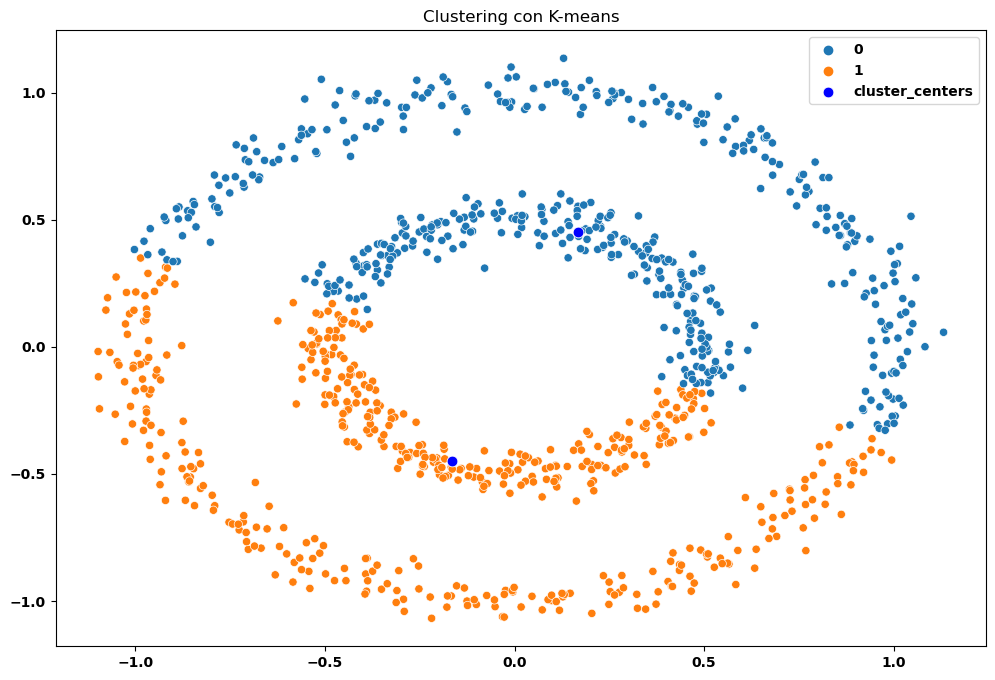

In [15]:
from sklearn.cluster import KMeans

modelo_km_22_1_2 = KMeans(n_clusters=2, random_state=100)

modelo_km_22_1_2.fit(datos_cir)

y_etiquetas_km_22_1_2 = modelo_km_22_1_2.labels_

centros_km_22_1_2 = modelo_km_22_1_2.cluster_centers_

print("SSE = ", modelo_km_22_1_2.inertia_)
print("Silhouette score = ", silhouette_score(datos_cir, y_etiquetas_km_22_1_2))

fig, axes = plt.subplots(1, figsize=(12,8))
sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=y_etiquetas_km_22_1_2)
sns.scatterplot(x=centros_km_22_1_2[:,0], y=centros_km_22_1_2[:,1], color='blue', s=60, label='cluster_centers')
plt.title("Clustering con K-means")
plt.show()

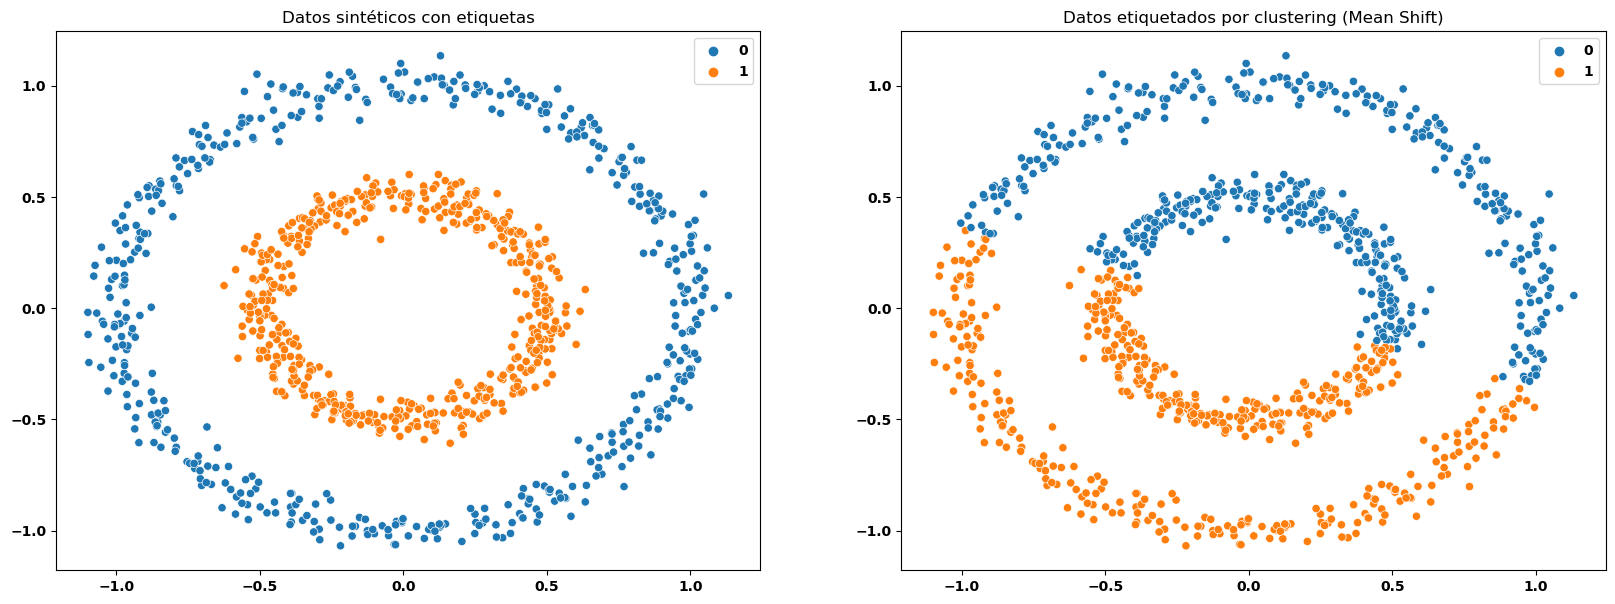

In [16]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=etiquetas_cir, ax=axes[0])
axes[0].set_title("Datos sintéticos con etiquetas")

sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=y_etiquetas_km_22_1_2, ax=axes[1])
axes[1].set_title("Datos etiquetados por clustering (Mean Shift)")

plt.show()

In [17]:
diff_pos_ms_22_1_2 = [i for i in range(len(y_etiquetas_km_22_1_2)) if y_etiquetas_km_22_1_2[i]!=etiquetas_cir[i]]
print("El modelo de clustering se ha equivocado en clasificar %s puntos" % len(diff_pos_ms_22_1_2))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_ms_22_1_2)/len(y_etiquetas_km_22_1_2))*100))
y_etiquetas_km_22_1_2[diff_pos_ms_22_1_2]

El modelo de clustering se ha equivocado en clasificar 499 puntos
El porcentage de acierto es 50.1%


array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,

Silhouette score =  0.35297376776384454


c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


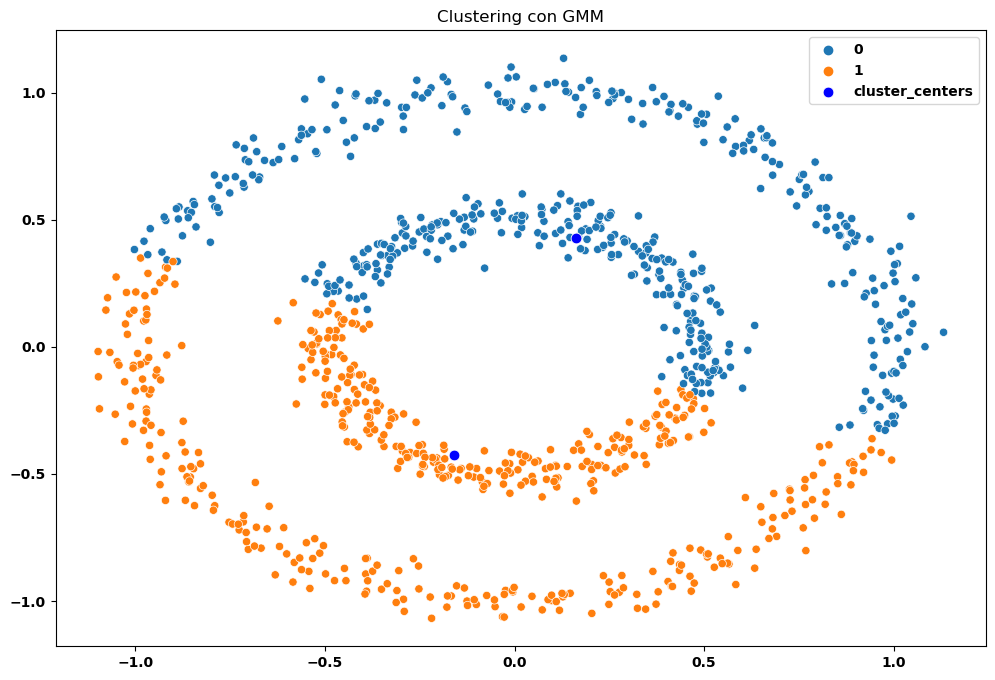

In [18]:
from sklearn.mixture import GaussianMixture

modelo_gmm_22_1_2 = GaussianMixture(n_components=2, random_state=100)

modelo_gmm_22_1_2.fit(datos_cir)

y_etiquetas_gmm_22_1_2 = modelo_gmm_22_1_2.predict(datos_cir)

centros_gmm_22_1_2 = modelo_gmm_22_1_2.means_

print("Silhouette score = ", silhouette_score(datos_cir, y_etiquetas_gmm_22_1_2))

fig, axes = plt.subplots(1, figsize=(12,8))
sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=y_etiquetas_gmm_22_1_2)
sns.scatterplot(x=centros_gmm_22_1_2[:,0], y=centros_gmm_22_1_2[:,1], color='blue', s=60, label='cluster_centers')
plt.title("Clustering con GMM")
plt.show()

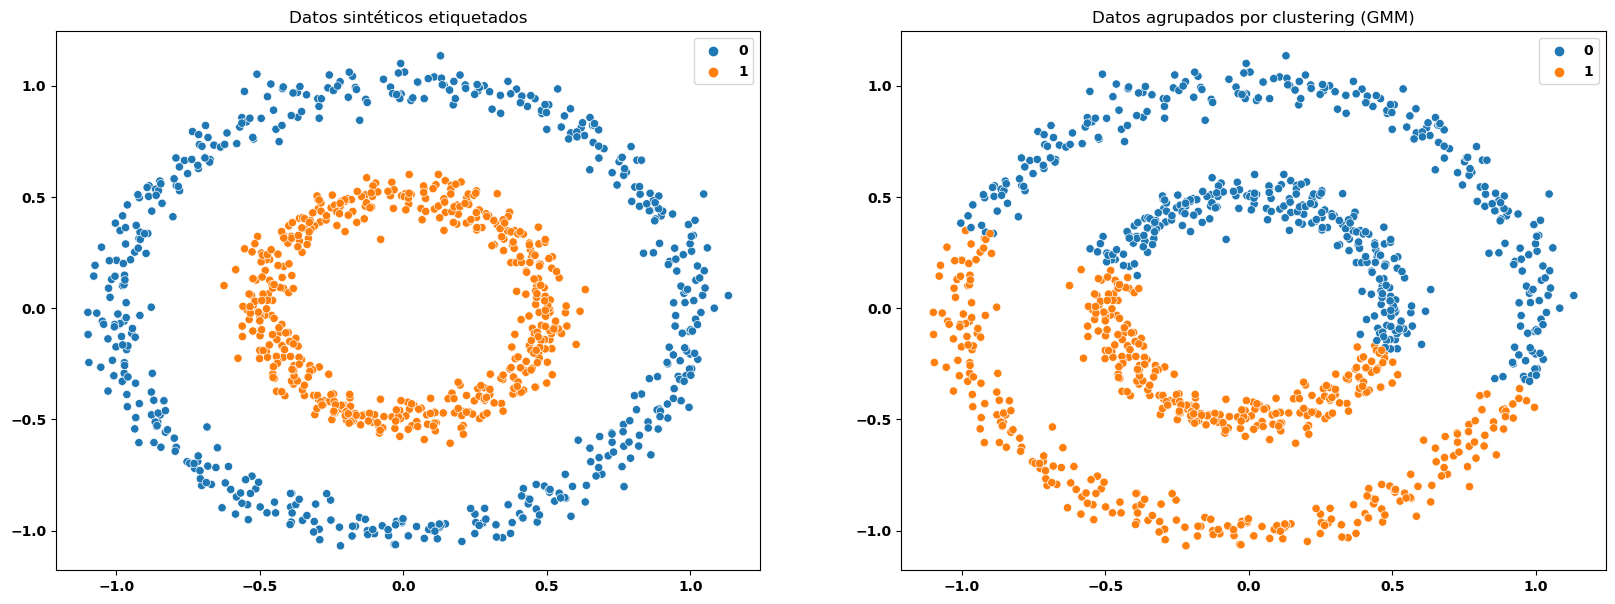

In [19]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=etiquetas_cir, ax=axes[0])
axes[0].set_title("Datos sintéticos etiquetados")

sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=y_etiquetas_gmm_22_1_2, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (GMM)")

plt.show()

In [20]:
diff_pos_gmm2 = [i for i in range(len(y_etiquetas_gmm_22_1_2)) if y_etiquetas_gmm_22_1_2[i]!=etiquetas_cir[i]]
print("El modelo de clustering se ha equivocado en clasificar %s puntos" % len(diff_pos_gmm2))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_gmm2)/len(y_etiquetas_gmm_22_1_2))*100))
y_etiquetas_gmm_22_1_2[diff_pos_gmm2]

El modelo de clustering se ha equivocado en clasificar 501 puntos
El porcentage de acierto es 49.9%


array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,

Silhouette score =  0.302675708391414


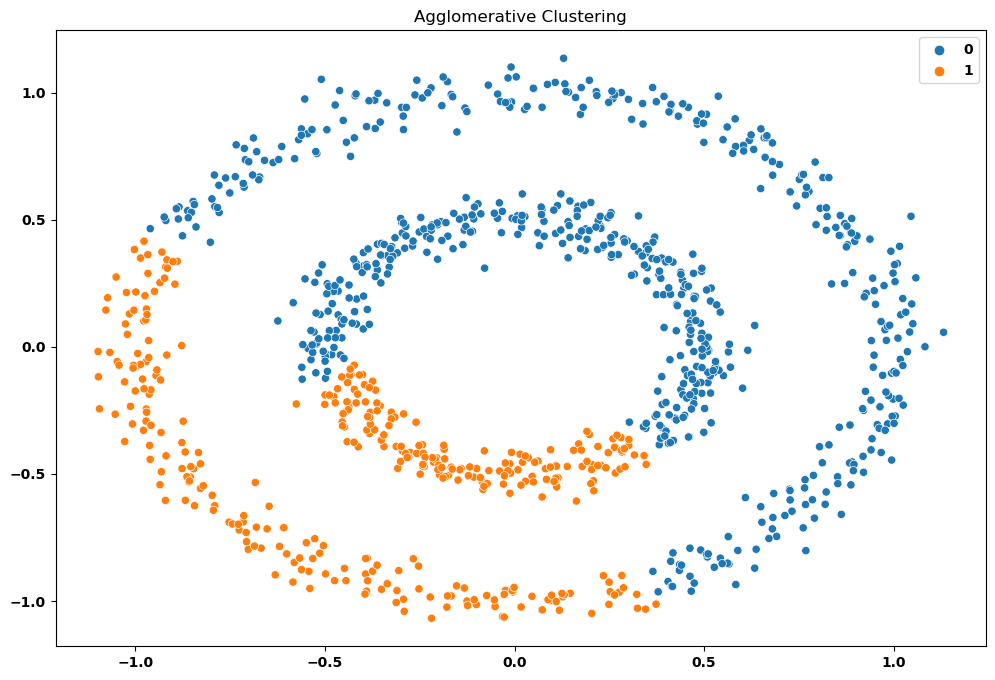

In [21]:
from sklearn.cluster import AgglomerativeClustering

modelo_agg_22_1_2 = AgglomerativeClustering(n_clusters=2, linkage='ward', metric='euclidean')

modelo_agg_22_1_2.fit(datos_cir)

y_etiquetas_agg_22_1_2 = modelo_agg_22_1_2.labels_

print("Silhouette score = ", silhouette_score(datos_cir, y_etiquetas_agg_22_1_2))

fig, axes = plt.subplots(1, figsize=(12,8))
sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=y_etiquetas_agg_22_1_2)
plt.title("Agglomerative Clustering")
plt.show()

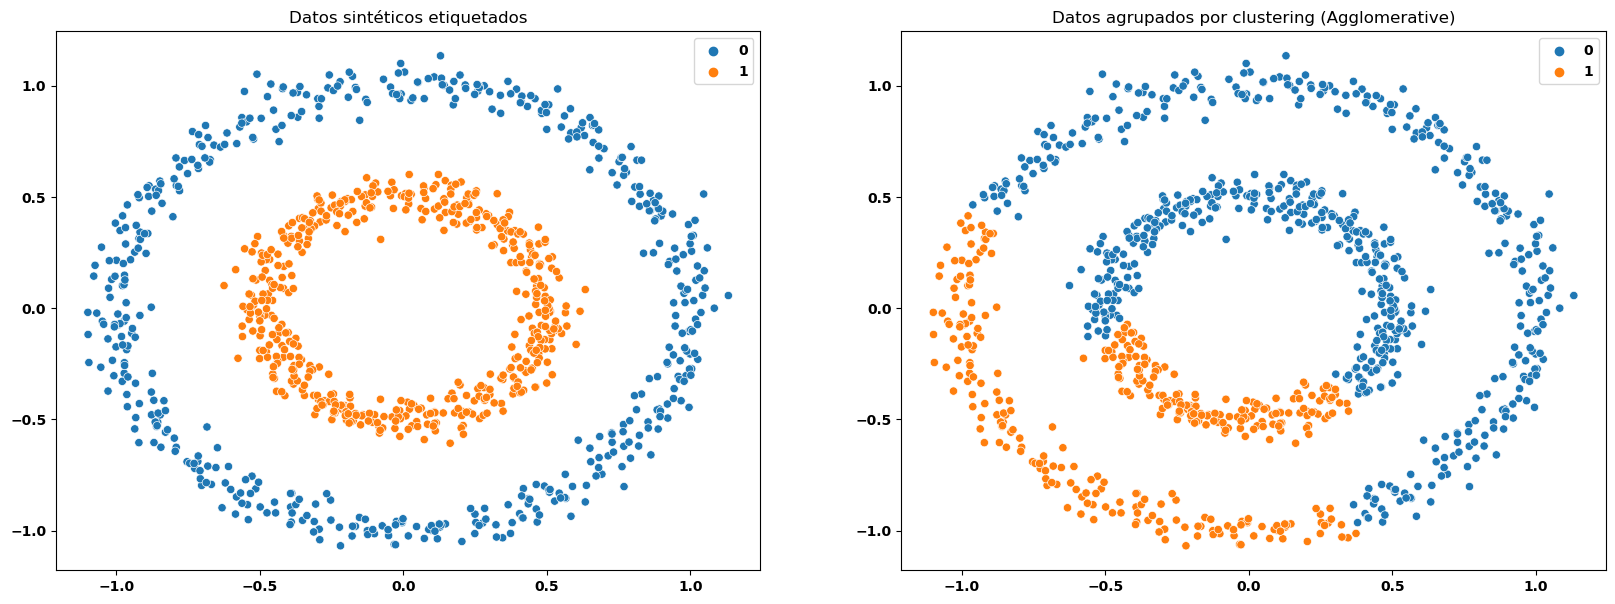

In [22]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=etiquetas_cir, ax=axes[0])
axes[0].set_title("Datos sintéticos etiquetados")

sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=y_etiquetas_agg_22_1_2, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (Agglomerative)")

plt.show()

In [23]:
diff_pos_agg_22_1_2 = [i for i in range(len(y_etiquetas_agg_22_1_2)) if y_etiquetas_agg_22_1_2[i]!=etiquetas_cir[i]]
print("El modelo de clustering se ha equivocado en clasificar %s puntos" % len(diff_pos_agg_22_1_2))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_agg_22_1_2)/len(y_etiquetas_agg_22_1_2))*100))
y_etiquetas_agg_22_1_2[diff_pos_agg_22_1_2]

El modelo de clustering se ha equivocado en clasificar 518 puntos
El porcentage de acierto es 48.199999999999996%


array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

Silhouette score =  0.11345362807929046


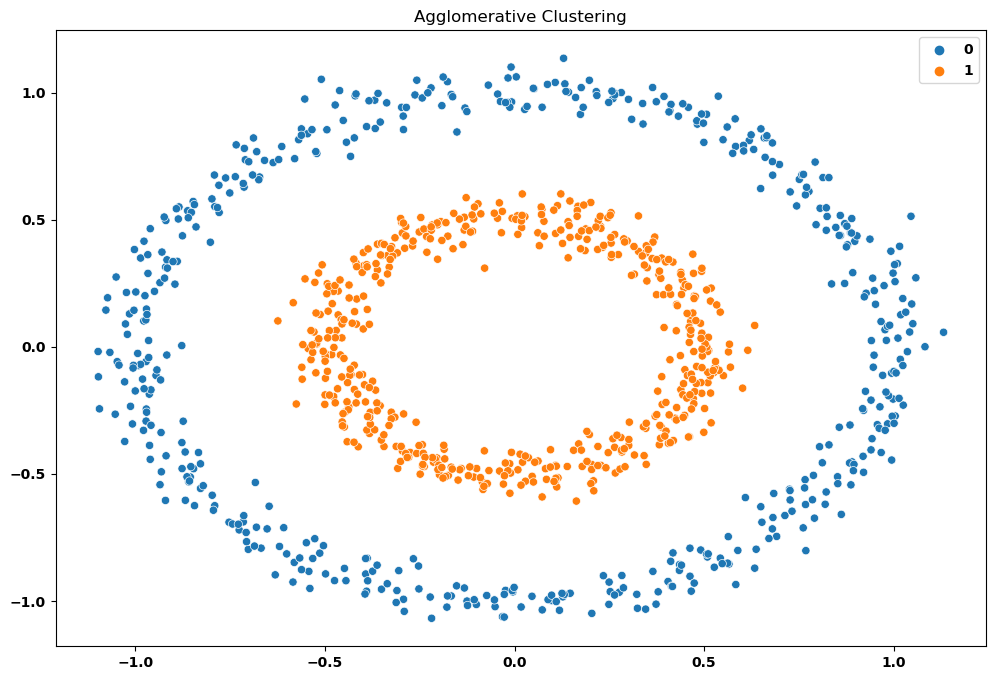

In [24]:
from sklearn.cluster import AgglomerativeClustering

modelo_agg_22_1_2 = AgglomerativeClustering(n_clusters=2, linkage='single', metric='euclidean')

modelo_agg_22_1_2.fit(datos_cir)

y_etiquetas_agg_22_1_2 = modelo_agg_22_1_2.labels_

print("Silhouette score = ", silhouette_score(datos_cir, y_etiquetas_agg_22_1_2))

fig, axes = plt.subplots(1, figsize=(12,8))
sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=y_etiquetas_agg_22_1_2)
plt.title("Agglomerative Clustering")
plt.show()

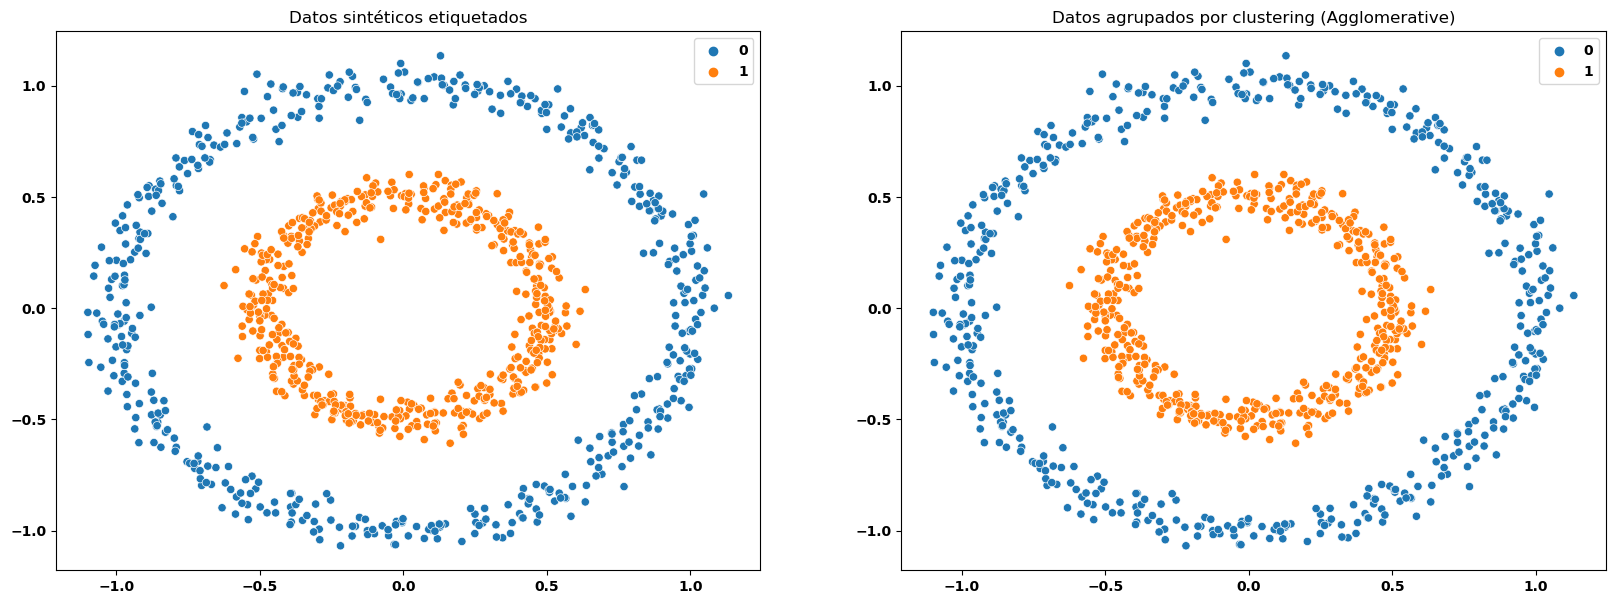

In [25]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=etiquetas_cir, ax=axes[0])
axes[0].set_title("Datos sintéticos etiquetados")

sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=y_etiquetas_agg_22_1_2, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (Agglomerative)")

plt.show()

In [26]:
diff_pos_agg_22_1_2 = [i for i in range(len(y_etiquetas_agg_22_1_2)) if y_etiquetas_agg_22_1_2[i]!=etiquetas_cir[i]]
print("El modelo de clustering se ha equivocado en clasificar %s puntos" % len(diff_pos_agg_22_1_2))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_agg_22_1_2)/len(y_etiquetas_agg_22_1_2))*100))
y_etiquetas_agg_22_1_2[diff_pos_agg_22_1_2]

El modelo de clustering se ha equivocado en clasificar 0 puntos
El porcentage de acierto es 100.0%


array([], dtype=int64)

Silhouette score =  0.11345362807929046


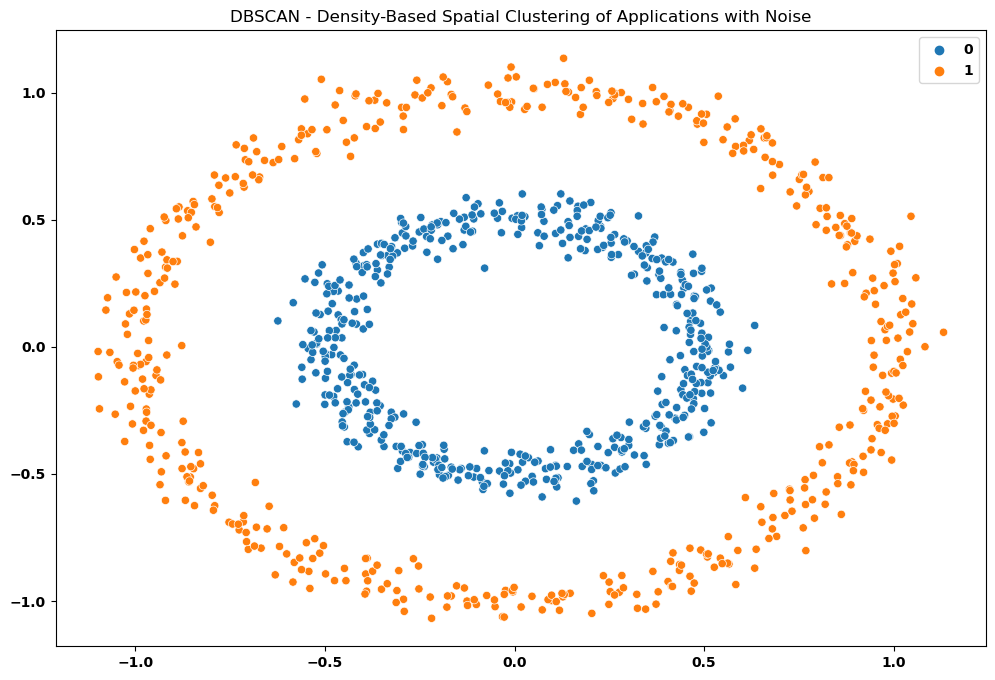

In [27]:
from sklearn.cluster import DBSCAN

modelo_dbscan_22_1_2 = DBSCAN(eps=0.25, n_jobs=-1)

modelo_dbscan_22_1_2.fit(datos_cir)

y_etiquetas_dbscan_22_1_2 = modelo_dbscan_22_1_2.labels_

print("Silhouette score = ", silhouette_score(datos_cir, y_etiquetas_dbscan_22_1_2))

fig, axes = plt.subplots(1, figsize=(12,8))
sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=y_etiquetas_dbscan_22_1_2)
plt.title("DBSCAN - Density-Based Spatial Clustering of Applications with Noise")
plt.show()

In [28]:
y_label_dbscan_22_1_2 = np.where(y_etiquetas_dbscan_22_1_2==0, 1, 0)
y_label_dbscan_22_1_2 = pd.Series(y_label_dbscan_22_1_2, name='label')
y_label_dbscan_22_1_2

0      1
1      1
2      0
3      1
4      0
      ..
995    1
996    0
997    0
998    0
999    1
Name: label, Length: 1000, dtype: int32

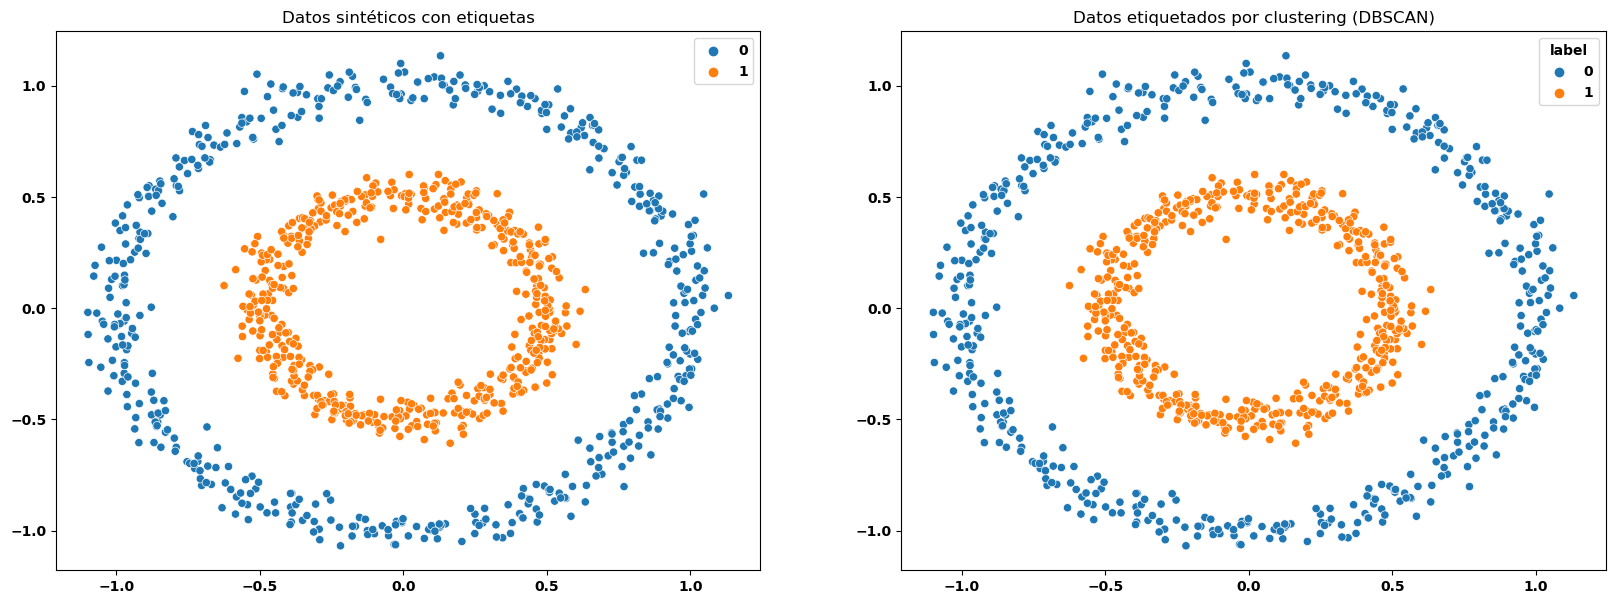

In [29]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=etiquetas_cir, ax=axes[0])
axes[0].set_title("Datos sintéticos con etiquetas")

sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=y_label_dbscan_22_1_2, ax=axes[1])
axes[1].set_title("Datos etiquetados por clustering (DBSCAN)")

plt.show()

In [30]:
diff_pos_dbscan_22_1_2 = [i for i in range(len(y_label_dbscan_22_1_2)) if y_label_dbscan_22_1_2[i]!=etiquetas_cir[i]]
print("El modelo de clustering se ha equivocado en clasificar %s puntos" % len(diff_pos_dbscan_22_1_2))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_dbscan_22_1_2)/len(y_label_dbscan_22_1_2))*100))
y_label_dbscan_22_1_2[diff_pos_dbscan_22_1_2]

El modelo de clustering se ha equivocado en clasificar 0 puntos
El porcentage de acierto es 100.0%


Series([], Name: label, dtype: int32)

Silhouette score =  0.11345362807929046


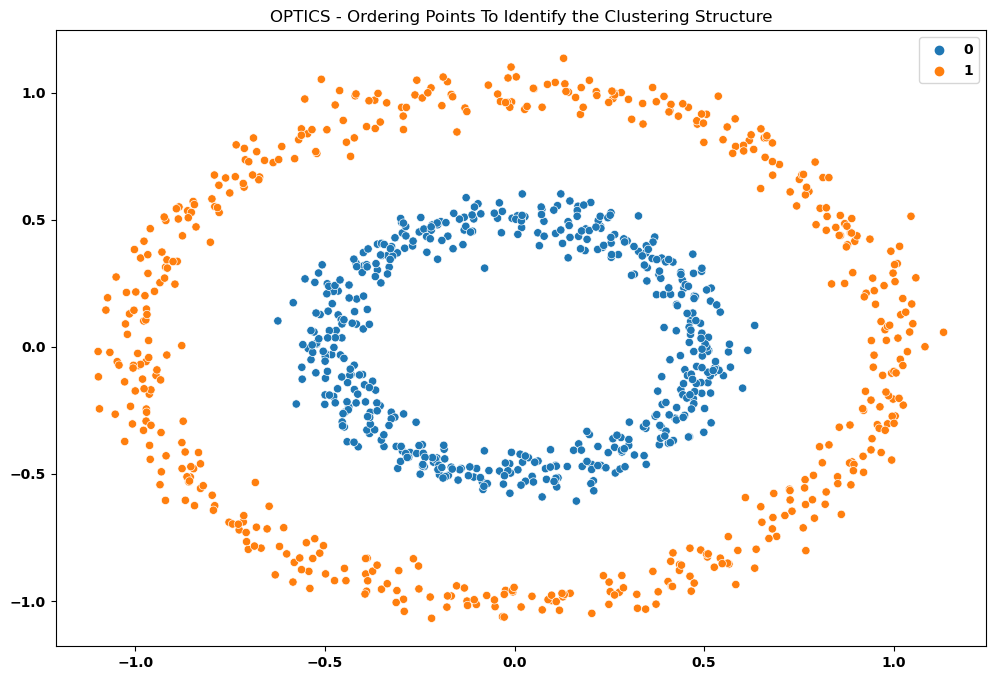

In [31]:
from sklearn.cluster import OPTICS

modelo_optics_22_1_2 = OPTICS(min_samples=7, xi=0.1, min_cluster_size=0.2, n_jobs=-1)

modelo_optics_22_1_2.fit(datos_cir)

y_etiquetas_optics_22_1_2 = modelo_optics_22_1_2.labels_

print("Silhouette score = ", silhouette_score(datos_cir, y_etiquetas_optics_22_1_2))

fig, axes = plt.subplots(1, figsize=(12,8))
sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=y_etiquetas_optics_22_1_2)
plt.title("OPTICS - Ordering Points To Identify the Clustering Structure")
plt.show()

In [32]:
y_label_optics_22_1_2 = np.where(y_etiquetas_optics_22_1_2==0, 1, 0)
y_label_optics_22_1_2 = pd.Series(y_label_optics_22_1_2, name='label')
y_label_optics_22_1_2

0      1
1      1
2      0
3      1
4      0
      ..
995    1
996    0
997    0
998    0
999    1
Name: label, Length: 1000, dtype: int32

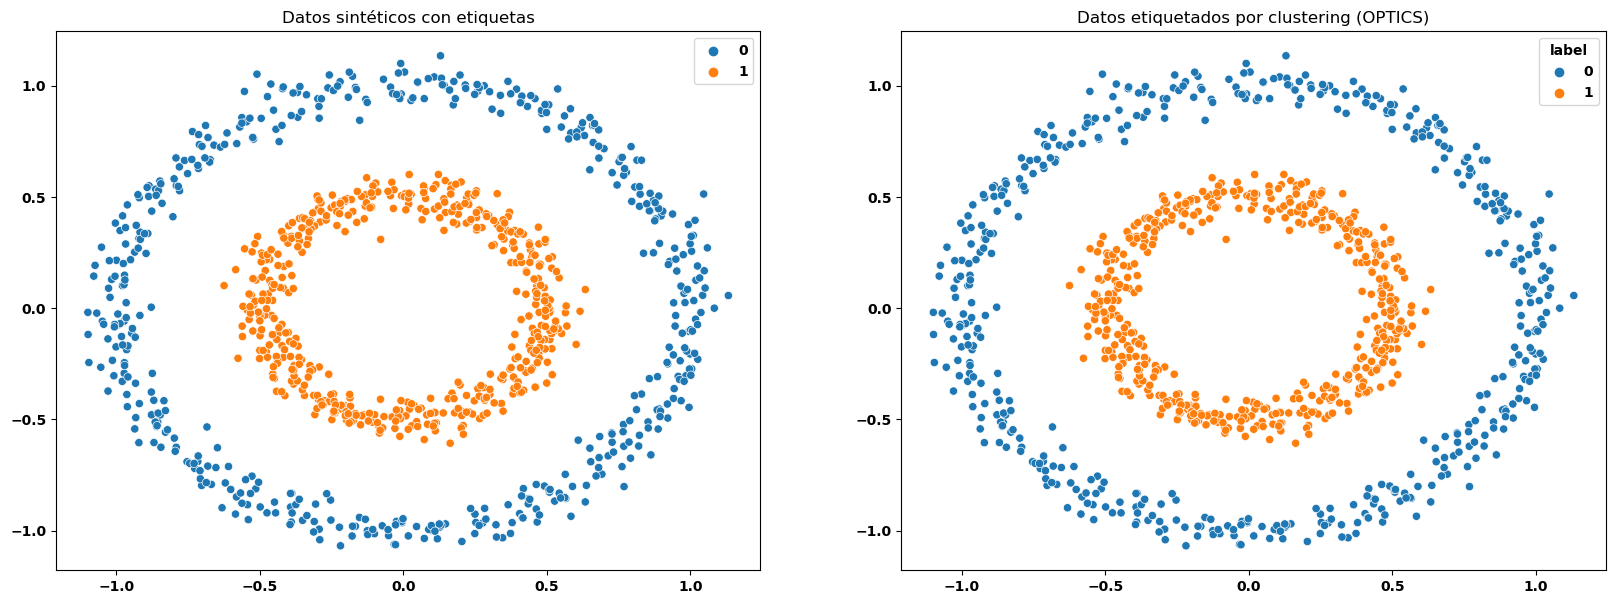

In [33]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=etiquetas_cir, ax=axes[0])
axes[0].set_title("Datos sintéticos con etiquetas")

sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=y_label_optics_22_1_2, ax=axes[1])
axes[1].set_title("Datos etiquetados por clustering (OPTICS)")

plt.show()

In [34]:
diff_pos_optics_22_1_2 = [i for i in range(len(y_label_optics_22_1_2)) if y_label_optics_22_1_2[i]!=etiquetas_cir[i]]
print("El modelo de clustering se ha equivocado en clasificar %s puntos" % len(diff_pos_optics_22_1_2))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_optics_22_1_2)/len(y_label_optics_22_1_2))*100))
y_label_optics_22_1_2[diff_pos_optics_22_1_2]

El modelo de clustering se ha equivocado en clasificar 0 puntos
El porcentage de acierto es 100.0%


Series([], Name: label, dtype: int32)

> #### Explicación 22.1.2
> Tras sacar las gráficas comparativas para cada modelo y sus porcentajes de aciertos, podemos llegar a la conclusión de que gran parte de ellos mantienen un porcentaje de acierto de en torno al **50%**, pero modelos como **DBSCAN, OPTICS y Agglomerative** (refinando sus parámetros) consiguen un porcentaje de **acierto perfecto (100%)**.

---